<a href="https://colab.research.google.com/github/Marrtinerz/ML-DS-Projects/blob/main/Project_1_Credit_Card_Fraud_Detection_SVM_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Combating Credit-Card Fraud: A Machine Learning Approach with Scikit-Learn and Snap ML


## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 10px">
    <ol>
        <li><a href="#premise">Premise/Problem</a></li>
        <li><a href="#premise">Data Source/Context</a></li>
        <li><a href="#import_libraries">Import Libraries</a></li>
        <li><a href="#dataset_analysis">Dataset Analysis</a></li>
        <li><a href="#dataset_preprocessing">Dataset Preprocessing</a></li>
        <li><a href="#dataset_split">Dataset Train/Test Split</a></li>
        <li><a href="#dt_sklearn">Build a Decision Tree Classifier model with Scikit-Learn</a></li>
        <li><a href="#dt_snap">Build a Decision Tree Classifier model with Snap ML</a></li>
        <li><a href="#dt_sklearn_snap">Evaluate the Scikit-Learn and Snap ML Decision Tree Classifiers</a></li>
        <li><a href="#svm_sklearn">Build a Support Vector Machine model with Scikit-Learn</a></li>
        <li><a href="#svm_snap">Build a Support Vector Machine model with Snap ML</a></li>
        <li><a href="#svm_sklearn_snap">Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models</a></li>
    </ol>
</div>
<br>
<hr>


## 1. Premise/Problem

I am a Data Scientist/Machine Learning Engineer working for a financial institution. My job is to build a model that predicts if a financial transaction is fraudulent or not. I will model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).

## 2. Data Source/Context

The data was sourced from Kaggle (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

The dataset contains transactions made by credit cards in September 2013 by European cardholders. The dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



In [1]:
# installing the opendatasets package
!pip install opendatasets

import opendatasets as od

od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: martinsnnamchi
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:00<00:00, 135MB/s]


## 3. Import Libraries

In [2]:
# Install Snap ML.
!pip install snapml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.4 MB/s eta 0:00:00


In [3]:
# Importing the needed libraries
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

## 4. Dataset Analysis


In [4]:
# reading the input data
raw_df = pd.read_csv('creditcardfraud/creditcard.csv')
print("There are {}".format(raw_df.shape[0]) + " observations in the credit card fraud dataset.")
print("There are {}".format(raw_df.shape[1]) + " variables in the dataset.")

# display the first rows in the dataset
raw_df.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In practice, a financial institution may have access to a much larger dataset of transactions. To simulate such a case, I inflated the original one 10 times.

In [5]:
n_replicas = 10

# inflate the original dataset
big_raw_df = pd.DataFrame(np.repeat(raw_df.values, n_replicas, axis=0), columns=raw_df.columns)

print("There are " + str(len(big_raw_df)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_df.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_df.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.


In [6]:
sizes = big_raw_df.Class.value_counts().values[0]
sizes

2843150

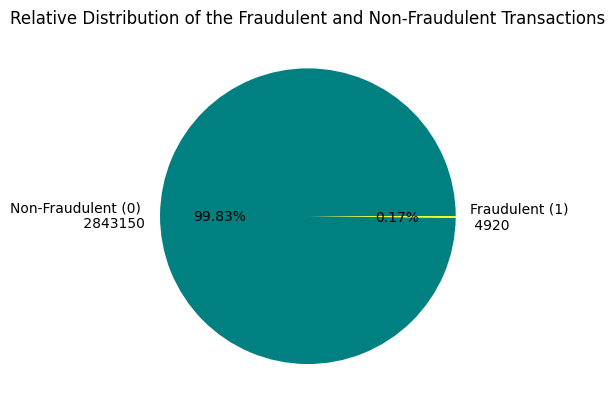

In [7]:
# get the set of distinct classes
labels = big_raw_df.Class.unique()

# get the count of each class
sizes = big_raw_df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=["Non-Fraudulent (0) \n {}".format(big_raw_df.Class.value_counts().values[0]),
                      "Fraudulent (1) \n {}".format(big_raw_df.Class.value_counts().values[1])], autopct='%1.2f%%', colors=["teal", "yellow"])
ax.set_title('Relative Distribution of the Fraudulent and Non-Fraudulent Transactions')
plt.show()

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). Thus, I will need to model a binary classification problem. Moreover, note that the dataset is highly unbalanced. The target variable classes are not represented equally. As a solution, I will bias the model to pay more attention to the samples in the minority class. The models to be created will be configured to consider the class weights of the samples during training/fitting.

### Distribution of the Transaction Amounts


The credit card transactions have different amounts. The distribution of the amounts, the min/max amounts, and the 90th percentile of the amount values are obtained below?


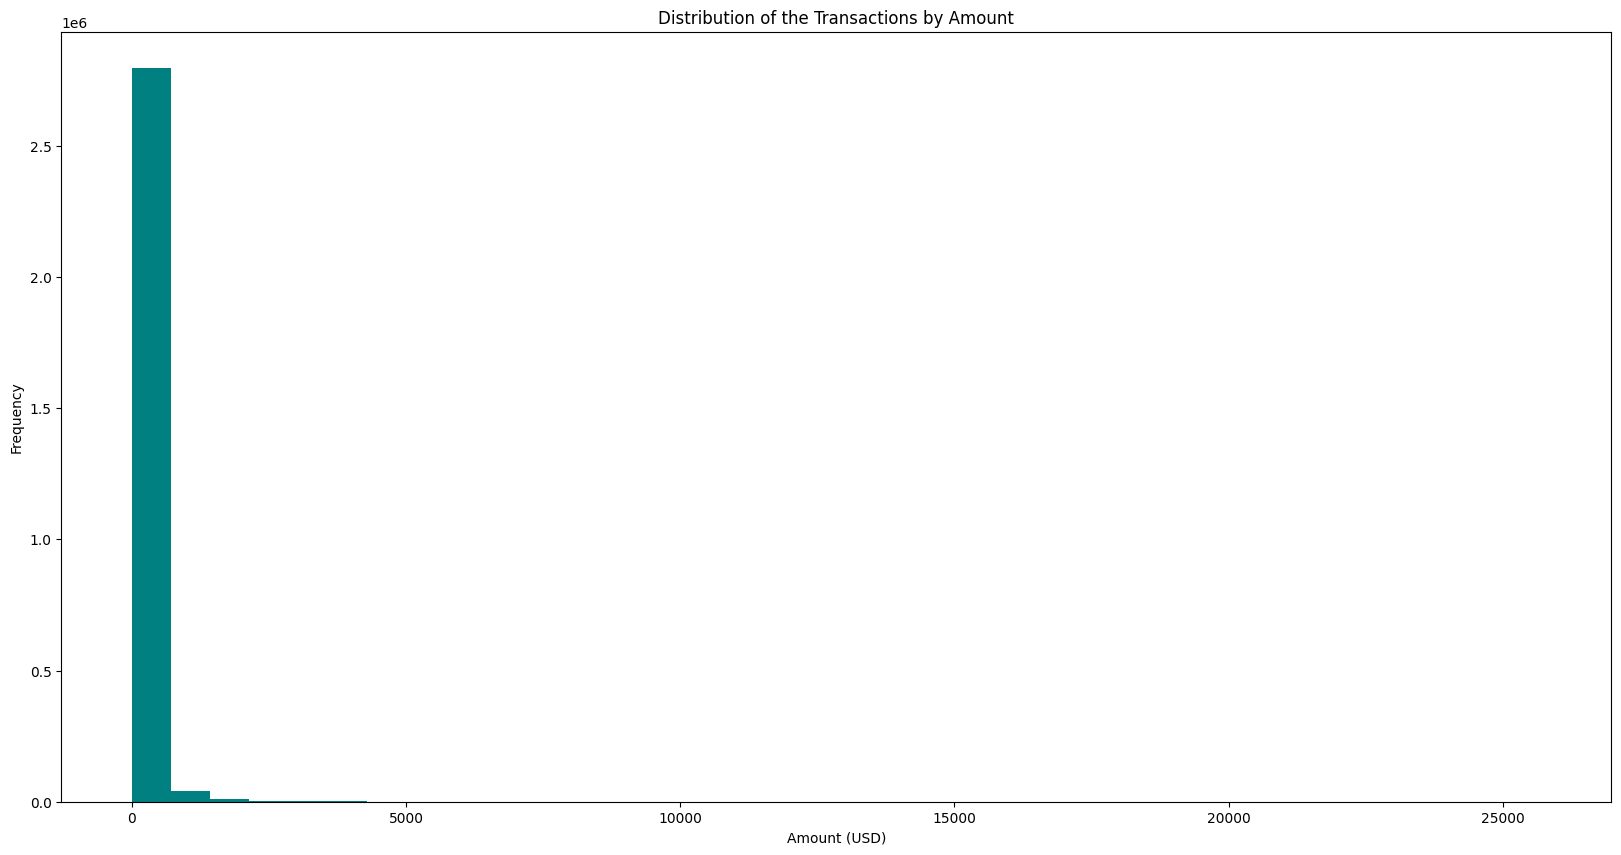

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less than or equal to  203.0


In [8]:
bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
        70, 75, 80, 85, 90, 95, 100, 120, 140, 160, 180, 200, 1000, 5000, 10000, 15000, 20000, 30000]
plt.figure(figsize=(20,10))
plt.hist(big_raw_df.Amount.values, bins="doane", histtype='bar', facecolor='teal')
plt.title("Distribution of the Transactions by Amount")
plt.xlabel("Amount (USD)")
plt.ylabel("Frequency")
plt.show()

print("Minimum amount value is ", np.min(big_raw_df.Amount.values))
print("Maximum amount value is ", np.max(big_raw_df.Amount.values))
print("90% of the transactions have an amount less than or equal to ", np.percentile(raw_df.Amount.values, 90))

## Dataset Preprocessing>


In this subsection, the data is prepared for training.


In [9]:

# feature standardization
big_raw_df.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_df.iloc[:, 1:30])
data_matrix = big_raw_df.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
x = data_matrix[:, 1:30]

# y: labels/target vector
y = data_matrix[:, 30]

# data normalization
x = normalize(x, norm="l1")

# print the shape of the features matrix and the labels vector
print('x.shape=', x.shape, 'y.shape=', y.shape)

x.shape= (2848070, 29) y.shape= (2848070,)


## Dataset Train/Test Split


Here, I divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
print('x_train.shape=', x_train.shape, 'y_train.shape=', y_train.shape)
print('x_test.shape=', x_test.shape, 'y_test.shape=', y_test.shape)

x_train.shape= (1993649, 29) y_train.shape= (1993649,)
x_test.shape= (854421, 29) y_test.shape= (854421,)


## Building a Decision Tree Classifier model with Scikit-Learn

### Visualizing the Class Imbalance

In [11]:
abs_freq = big_raw_df.Class.value_counts()
abs_freq

Class
0.0    2843150
1.0       4920
Name: count, dtype: int64

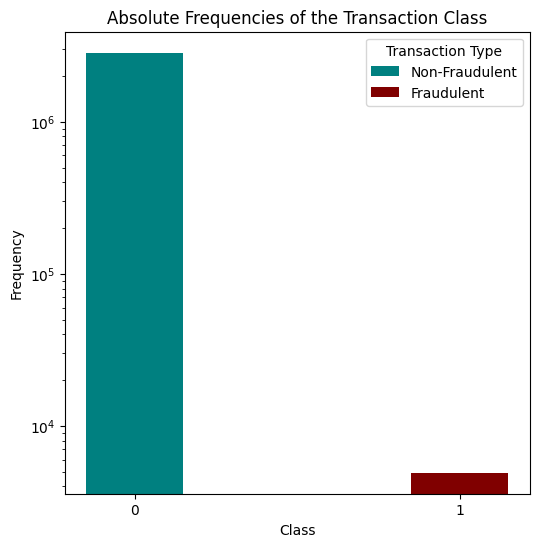

In [12]:
fig, ax = plt.subplots(figsize=(6,6))

label = ['Non-Fraudulent', 'Fraudulent']
bar_colors = ['teal', 'maroon']

ax.bar(abs_freq.index, abs_freq.values, label=label, color=bar_colors, log=True, width=0.3, align="center", tick_label=[0, 1])

ax.set_ylabel('Frequency')
ax.set_xlabel("Class")
ax.set_title('Absolute Frequencies of the Transaction Class')
ax.legend(title='Transaction Type')

plt.show()

### Computing Sample Weights/Model Building

In [13]:
# computing the sample weights to be used as input to the train routine so that
# it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
start_time = time.time()
sklearn_dt.fit(x_train, y_train, sample_weight=w_train)
end_time = time.time()
sklearn_duration = end_time - start_time
print("[Scikit-Learn] Training time (s): {0:.3f}".format(sklearn_duration))

[Scikit-Learn] Training time (s): 71.222


## Build a Decision Tree Classifier model with Snap ML

In [14]:
# if not already computed,
# compute the sample weights to be used as input to the train routine so that
# it takes into account the class imbalance present in this dataset
# w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from Snap ML
from snapml import DecisionTreeClassifier

# Snap ML offers multi-threaded CPU/GPU training of decision trees, unlike scikit-learn
# to use the GPU, set the use_gpu parameter to True
# snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)

# to set the number of CPU threads used at training time, set the n_jobs parameter
# for reproducible output across multiple function calls, set random_state to a given integer value
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

# train a Decision Tree Classifier model using Snap ML
start_time = time.time()
snapml_dt.fit(x_train, y_train, sample_weight=w_train)
end_time = time.time()
snap_duration = end_time - start_time
print("[Snap ML] Training time (s):  {0:.3f}".format(snap_duration))

[Snap ML] Training time (s):  7.288


## Evaluate the Scikit-Learn and Snap ML Decision Tree Classifier Models


In [15]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_duration/snap_duration
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(x_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(x_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 9.77x 
[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


As shown above both decision tree models provide the same score on the test dataset. However Snap ML runs the training routine approx. 10x faster than Scikit-Learn. This is one of the advantages of using Snap ML: acceleration of training of classical machine learning models, such as linear and tree-based models.


## Build a Support Vector Machine model with Scikit-Learn

In [16]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(x_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  101.08


<div id="svm_snap">
    <h2>Build a Support Vector Machine model with Snap ML</h2>
</div>


In [18]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs
# to use the GPU, set the use_gpu parameter to True
# snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
# print(snapml_svm.get_params())

# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(x_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  22.33


<div id="svm_sklearn_snap">
    <h2>Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models</h2>
</div>


In [20]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(x_test)

# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

# run inference using the Snap ML model
# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(x_test)

# evaluate accuracy on test set
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 4.53x 
[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985


As shown above both SVM models provide the same score on the test dataset. However, as in the case of decision trees, Snap ML runs the training routine faster than Scikit-Learn.

### Evaluation Using the Hinge Loss Metric


I run inference on the test set using both Scikit-Learn and Snap ML models. Compute the hinge loss metric for both sets of predictions.


In [22]:
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(x_test)
snapml_pred  = snapml_svm.decision_function(x_test)

# import the hinge_loss metric from scikit-learn
from sklearn.metrics import hinge_loss

# evaluate the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

# evaluate the hinge loss metric from the predictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_snapml))

# the two models should give the same Hinge loss

[Snap ML] Hinge loss:   0.228
[Scikit-Learn] Hinge loss:   0.228


## Conclusions

Snap ML is a significantly faster model for predicting fraudulent credit card transactions.

The Support Vector Machine model performs slightly better at predicting fraudulent credit card transactions, as evidenced by its ROC-AUC score of ~0.984.

### Author


Martins Nnamchi

## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
|   |   |   |   |


 This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).
